# 시각화

In [2]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

# 데이터 전처리

## 관광여행횟수_성별_연령_월별(2020-2022) = gender_age_month(2020-2022)

### 1. 년도별 전체(소계) 비교 - 2020, 2021, 2022년도 합계
### 2. 3년도는 합치고 월별 비교(계절별 확인하기위해)
### 3. 3년도는 합치고 남여 비교
### 4. 3년도는 합치고 나이대별 비교

In [4]:
import numpy as np
import pandas as pd
import pymongo
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection=db['gender_age_month(2020-2022)']
data = collection.find()
df_gender_age_month = pd.DataFrame(data)
df_gender_age_month

,_id,classification,values,year,month,visitor_counts
0,662616c8db3227b4f2b2649c,전체,소계,2020,1월,18037
1,662616c8db3227b4f2b2649d,전체,소계,2020,2월,11381
2,662616c8db3227b4f2b2649e,전체,소계,2020,3월,9131
3,662616c8db3227b4f2b2649f,전체,소계,2020,4월,12443
4,662616c8db3227b4f2b264a0,전체,소계,2020,5월,15824
...,...,...,...,...,...,...
355,662616c8db3227b4f2b265ff,연령,70대 이상,2022,8월,1008
356,662616c8db3227b4f2b26600,연령,70대 이상,2022,9월,1427
357,662616c8db3227b4f2b26601,연령,70대 이상,2022,10월,1320
358,662616c8db3227b4f2b26602,연령,70대 이상,2022,11월,1278


In [5]:
# 결측치와 이상치 확인     -> 없음 확인
df_gender_age_month.isnull().sum()

_id               0
classification    0
values            0
year              0
month             0
visitor_counts    0
dtype: int64

In [6]:
# 전체적인 컬럼 확인
df_gender_age_month.columns

Index(['_id', 'classification', 'values', 'year', 'month', 'visitor_counts'], dtype='object')

In [7]:
# 년도별 전체(소계) 비교 - 2020, 2021, 2022년도 합계
df_gender_age_month_totalsum = df_gender_age_month[df_gender_age_month['classification'] == '전체'].sort_values('visitor_counts', ascending=False)

In [8]:
## 년도별 전체(소계) 비교 - 2020, 2021, 2022년도 합계
pd.pivot_table(data=df_gender_age_month_totalsum,index='year',values='visitor_counts',aggfunc='sum')

,visitor_counts
year,
2020,170642
2021,198801
2022,241688


In [9]:
# 3년도는 합치고 월별 비교(계절별 확인하기위해)
df_gender_age_month_season = df_gender_age_month[df_gender_age_month['classification'] == '전체'].sort_values('visitor_counts', ascending=False)

In [13]:
## 3년도는 합치고 월별 비교(계절별 확인하기위해)
pivot_season_month = pd.pivot_table(data=df_gender_age_month_season,index='month',values='visitor_counts',aggfunc='sum').sort_values('visitor_counts', ascending=False)
pivot_season_month = pivot_season_month.reindex(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월','11월','12월'])
pivot_season_month

,visitor_counts
month,
1월,47483
2월,39540
3월,41117
4월,49234
5월,56499
6월,53528
7월,58016
8월,59698
9월,50931


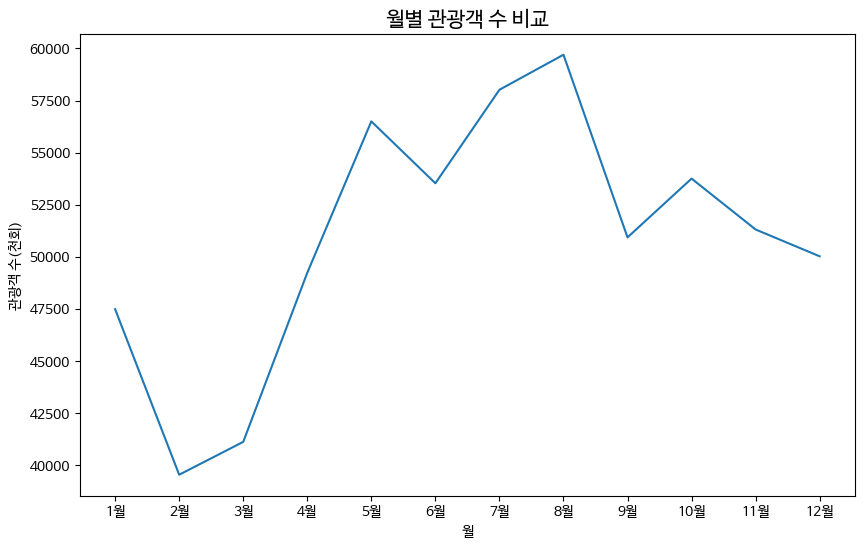

In [72]:
### 3년도는 합치고 월별 비교 차트화
plt.figure(figsize=(10, 6))
# pivot_members_sex_day.plot(kind='bar',  figsize=(10, 7))
sns.lineplot(data=pivot_season_month, x='month', y='visitor_counts')
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('월별 관광객 수 비교', fontsize=15)
plt.xlabel('월')
plt.ylabel('관광객 수(천회)')

# 그래프 표시
plt.show()

In [15]:
# 3년도는 합치고 남여 비교
df_gender_age_month_gendercompare = df_gender_age_month[df_gender_age_month['classification'] == '성별'].sort_values('visitor_counts', ascending=False)

In [16]:
## 3년도는 합치고 남여 비교
pd.pivot_table(data=df_gender_age_month_gendercompare,index='values',values='visitor_counts',aggfunc='sum')

,visitor_counts
values,
남자,299824
여자,311310


In [17]:
# 3년도는 합치고 나이대별 비교
df_gender_age_month_agecompare = df_gender_age_month[df_gender_age_month['classification'] == '연령'].sort_values('visitor_counts', ascending=False)

In [18]:
## 3년도는 합치고 나이대별 비교
# pivot_agecompare_month = pd.pivot_table(data=df_gender_age_month_agecompare,index='values',columns='month',values='visitor_counts',aggfunc='sum')
pivot_agecompare_month = pd.pivot_table(data=df_gender_age_month_agecompare,index='values',values='visitor_counts',aggfunc='sum')
# pivot_agecompare_month = pivot_month.reindex(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월','11월','12월'])
pivot_agecompare_month

,visitor_counts
values,
15~19세,19151
20대,118615
30대,124631
40대,126390
50대,120709
60대,73860
70대 이상,27772


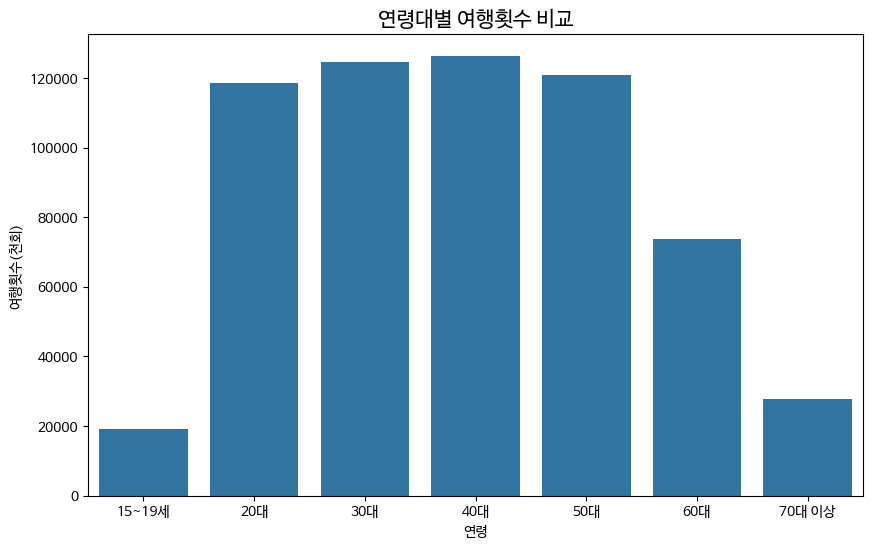

In [19]:
### 3년도는 합치고 나이대별 비교 차트화
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_agecompare_month, x='values', y='visitor_counts')
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('연령대별 여행횟수 비교', fontsize=15)
plt.xlabel('연령')
plt.ylabel('여행횟수(천회)')

# 그래프 표시
plt.show()

In [20]:
# 3년도는 합치고 월별 남여 비교
df_gender_age_month_monthgendercompare = df_gender_age_month[df_gender_age_month['classification'] == '성별'].sort_values('visitor_counts', ascending=False)

In [21]:
## 월별 남여 여행비율이 다른것이다?
pivot_sex=pd.pivot_table(data=df_gender_age_month_monthgendercompare,index='month',columns='values',values='visitor_counts',aggfunc='sum')
pivot_sex=pivot_sex.reindex(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월','11월','12월'])
pivot_sex

values,남자,여자
month,,
1월,23442,24041
2월,19729,19811
3월,19951,21167
4월,23763,25472
5월,26880,29621
6월,26138,27391
7월,28887,29129
8월,29641,30056
9월,25341,25590


In [74]:
## 월별 남여 여행비율이 다른것이다?
pivot_sex=pd.pivot_table(data=df_gender_age_month_monthgendercompare,index='values',values='visitor_counts',aggfunc='sum')
pivot_sex

,visitor_counts
values,
남자,299824
여자,311310


<Figure size 1000x600 with 0 Axes>

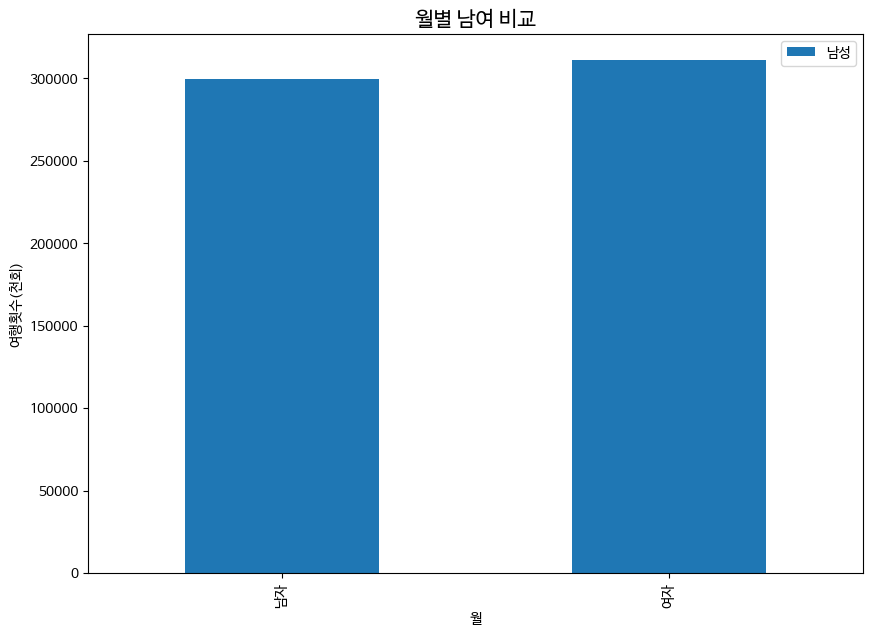

In [75]:
### 3년도는 합치고 월별 남여 비교 차트화
plt.figure(figsize=(10, 6))
# pivot_sex.plot(kind='bar', stacked=True, figsize=(10, 7))
ax = pivot_sex.plot(kind='bar', figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('월별 남여 비교', fontsize=15)
plt.xlabel('월')
plt.ylabel('여행횟수(천회)')

# 범례 추가
ax.legend(["남성", "여성"], loc='upper right')

# 그래프 표시
plt.show()

<Figure size 1000x600 with 0 Axes>

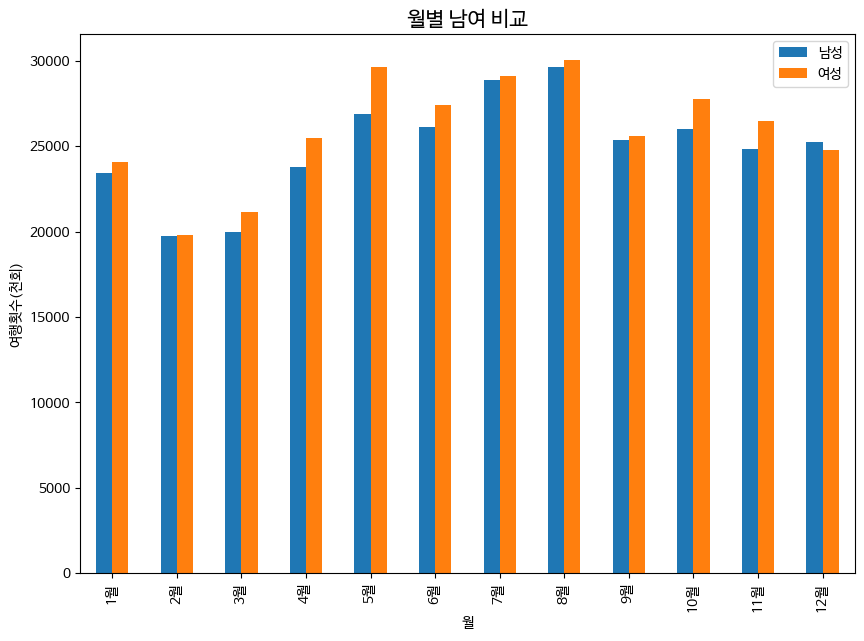

In [22]:
### 3년도는 합치고 월별 남여 비교 차트화
plt.figure(figsize=(10, 6))
# pivot_sex.plot(kind='bar', stacked=True, figsize=(10, 7))
ax = pivot_sex.plot(kind='bar', figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('월별 남여 비교', fontsize=15)
plt.xlabel('월')
plt.ylabel('여행횟수(천회)')

# 범례 추가
ax.legend(["남성", "여성"], loc='upper right')

# 그래프 표시
plt.show()

In [66]:
## 3년도는 합치고 나이대별 비교
# pivot_agecompare_month = pd.pivot_table(data=df_gender_age_month_agecompare,index='values',columns='month',values='visitor_counts',aggfunc='sum')
pivot_agec_month = pd.pivot_table(data=df_gender_age_month_agecompare,index='values',columns='month',values='visitor_counts',aggfunc='sum')
pivot_agec_month=pivot_agec_month.loc[:,['12월']]
# pivot_agec_month = pivot_agec_month.reindex(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월','11월','12월'])


<Figure size 1000x600 with 0 Axes>

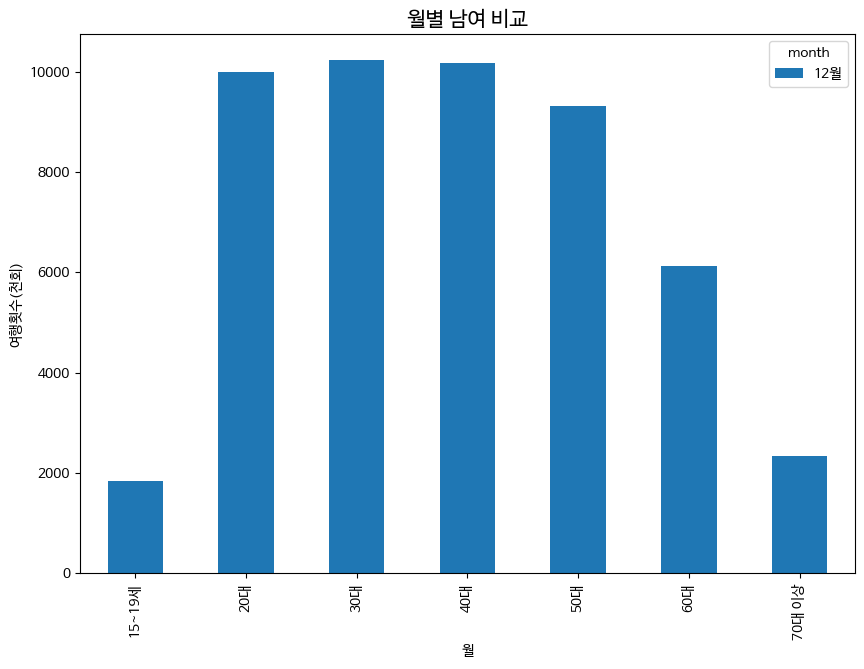

In [67]:
### 3년도는 합치고 월별 남여 비교 차트화
plt.figure(figsize=(10, 6))
# pivot_sex.plot(kind='bar', stacked=True, figsize=(10, 7))
ax = pivot_agec_month.plot(kind='bar', figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('월별 남여 비교', fontsize=15)
plt.xlabel('월')
plt.ylabel('여행횟수(천회)')

# 그래프 표시
plt.show()

In [26]:
df_gender_age_month_2020 = df_gender_age_month[df_gender_age_month['classification'] == '전체'].sort_values('visitor_counts', ascending=False)
df_gender_age_month_2020

,_id,classification,values,year,month,visitor_counts
31,662616c8db3227b4f2b264bb,전체,소계,2022,8월,23383
33,662616c8db3227b4f2b264bd,전체,소계,2022,10월,22229
30,662616c8db3227b4f2b264ba,전체,소계,2022,7월,21865
34,662616c8db3227b4f2b264be,전체,소계,2022,11월,21661
28,662616c8db3227b4f2b264b8,전체,소계,2022,5월,21469
32,662616c8db3227b4f2b264bc,전체,소계,2022,9월,20921
29,662616c8db3227b4f2b264b9,전체,소계,2022,6월,20439
35,662616c8db3227b4f2b264bf,전체,소계,2022,12월,20412
27,662616c8db3227b4f2b264b7,전체,소계,2022,4월,20190
16,662616c8db3227b4f2b264ac,전체,소계,2021,5월,19206


In [27]:
# pd.pivot_table(data=df_gender_age_month_2020,index='year',columns='month',values='visitor_counts',aggfunc='sum')
# pd.pivot_table(data=df_gender_age_month_2020,index='year',values='visitor_counts',aggfunc='sum')
pd.pivot_table(data=df_gender_age_month,index='values',columns='month',values='visitor_counts',aggfunc='mean')
# pd.pivot_table(data=df_gender_age_month_2020,index='month',values='visitor_counts',aggfunc='mean')

month,10월,11월,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월
values,,,,,,,,,,,,
15~19세,517.666667,433.666667,613.333333,535.666667,423.333333,418.000000,460.333333,561.666667,509.666667,646.333333,722.666667,541.333333
20대,3297.000000,3243.333333,3330.000000,3164.000000,2566.333333,2719.333333,3207.333333,3611.000000,3544.666667,3905.666667,3834.333333,3115.333333
30대,3582.333333,3429.666667,3410.666667,3341.333333,2808.000000,2801.000000,3433.333333,3721.666667,3575.000000,3913.333333,4044.000000,3483.333333
40대,3705.666667,3443.666667,3391.000000,3218.333333,2848.000000,2867.333333,3447.000000,3892.000000,3572.000000,4065.666667,4243.666667,3435.666667
50대,3657.666667,3490.333333,3107.000000,3030.000000,2591.333333,2674.333333,3203.333333,3800.000000,3721.666667,3699.666667,3978.666667,3282.333333
60대,2250.666667,2266.333333,2044.333333,1875.666667,1406.333333,1627.333333,1997.000000,2250.333333,2100.666667,2248.333333,2305.000000,2248.000000
70대 이상,906.666667,796.000000,777.000000,662.666667,536.666667,598.000000,663.333333,996.666667,819.333333,859.333333,770.666667,871.000000
남자,8664.333333,8279.000000,8407.333333,7814.000000,6576.333333,6650.333333,7921.000000,8960.000000,8712.666667,9629.000000,9880.333333,8447.000000
소계,17917.666667,17103.000000,16674.333333,15827.666667,13180.000000,13705.666667,16411.333333,18833.000000,17842.666667,19338.666667,19899.333333,16977.000000
